In [110]:
from bs4 import BeautifulSoup
import pandas as pd
import requests
import string
import nltk
from nltk.corpus import stopwords
from collections import Counter
import re
from textblob import Word, TextBlob
import matplotlib.pyplot as plt
from wordcloud import WordCloud



# Data Scraping

In [5]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 39
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())

    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews
Scraping page 11
   ---> 1100 total reviews
Scraping page 12
   ---> 1200 total reviews
Scraping page 13
   ---> 1300 total reviews
Scraping page 14
   ---> 1400 total reviews
Scraping page 15
   ---> 1500 total reviews
Scraping page 16
   ---> 1600 total reviews
Scraping page 17
   ---> 1700 total reviews
Scraping page 18
   ---> 1800 total reviews
Scraping page 19
   ---> 1900 total reviews
Scraping page 20
   ---> 2000 total reviews
Scraping page 21
   ---> 2100 total reviews
Scraping page 22
   ---> 2200 total reviews
Scraping page 23
   ---> 2300 total reviews
Scrapi

In [6]:
df = pd.DataFrame(reviews)
df.head()

,0
0,Not Verified | We had a Premium Economy retur...
1,✅ Trip Verified | I should like to review my ...
2,✅ Trip Verified | We have flown with British A...
3,✅ Trip Verified | I sat in the plane at Vienna...
4,✅ Trip Verified | It is almost 11pm we were su...


In [10]:
df.shape


(3805, 1)

# Data Cleaning & Preprocessing 

#### Lowercase Conversion

In [19]:
# Lowercase Conversion
df = df.rename(columns={0: 'reviews'})
df["lowercase"] = df['reviews'].str.lower()
df.head()

,reviews,lowercase
0,Not Verified | We had a Premium Economy retur...,not verified | we had a premium economy retur...
1,✅ Trip Verified | I should like to review my ...,✅ trip verified | i should like to review my ...
2,✅ Trip Verified | We have flown with British A...,✅ trip verified | we have flown with british a...
3,✅ Trip Verified | I sat in the plane at Vienna...,✅ trip verified | i sat in the plane at vienna...
4,✅ Trip Verified | It is almost 11pm we were su...,✅ trip verified | it is almost 11pm we were su...


#### Removal of Punctuation

In [22]:
# Removal of Punctuation
punct_to_remove = string.punctuation

def remove_punctuations(text):
    return text.translate(str.maketrans('', '', punct_to_remove))

df['text_with_no_punc'] = df['lowercase'].apply(lambda text: remove_punctuations(text))
df.head()

,reviews,lowercase,text_with_no_punc
0,Not Verified | We had a Premium Economy retur...,not verified | we had a premium economy retur...,not verified we had a premium economy return...
1,✅ Trip Verified | I should like to review my ...,✅ trip verified | i should like to review my ...,✅ trip verified i should like to review my f...
2,✅ Trip Verified | We have flown with British A...,✅ trip verified | we have flown with british a...,✅ trip verified we have flown with british ai...
3,✅ Trip Verified | I sat in the plane at Vienna...,✅ trip verified | i sat in the plane at vienna...,✅ trip verified i sat in the plane at vienna ...
4,✅ Trip Verified | It is almost 11pm we were su...,✅ trip verified | it is almost 11pm we were su...,✅ trip verified it is almost 11pm we were sup...


#### Removal of Stopwords

In [29]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/ricardordoriguez/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [34]:
# Removal of Stopwords
sw = stopwords.words('english')

df["no_stop_words"] = df["text_with_no_punc"].apply(lambda x: " ".join(x for x in str(x).split() if x not in sw))
df.head()

,reviews,lowercase,text_with_no_punc,no_stop_words
0,Not Verified | We had a Premium Economy retur...,not verified | we had a premium economy retur...,not verified we had a premium economy return...,verified premium economy return flight los ang...
1,✅ Trip Verified | I should like to review my ...,✅ trip verified | i should like to review my ...,✅ trip verified i should like to review my f...,✅ trip verified like review flight british air...
2,✅ Trip Verified | We have flown with British A...,✅ trip verified | we have flown with british a...,✅ trip verified we have flown with british ai...,✅ trip verified flown british airways times la...
3,✅ Trip Verified | I sat in the plane at Vienna...,✅ trip verified | i sat in the plane at vienna...,✅ trip verified i sat in the plane at vienna ...,✅ trip verified sat plane vienna airport three...
4,✅ Trip Verified | It is almost 11pm we were su...,✅ trip verified | it is almost 11pm we were su...,✅ trip verified it is almost 11pm we were sup...,✅ trip verified almost 11pm supposed take 1920...


#### Removal of Frequent and rare words

In [49]:
cnt = Counter()
for text in df["no_stop_words"].values:
    for word in text.split():
        cnt[word] += 1

cnt.most_common(10)

[('flight', 6830),
 ('ba', 4694),
 ('service', 2904),
 ('seat', 2425),
 ('food', 2388),
 ('verified', 2267),
 ('crew', 2218),
 ('british', 2216),
 ('london', 2215),
 ('airways', 2191)]

In [40]:
FREQWORDS = set([w for (w, wc) in cnt.most_common(10)])

df["no_frq_words"] = df["no_stop_words"].apply(lambda text: " ".join([word for word in str(text).split() if word not in FREQWORDS]))
df.head()       

,reviews,lowercase,text_with_no_punc,no_stop_words,no_frq_words
0,Not Verified | We had a Premium Economy retur...,not verified | we had a premium economy retur...,not verified we had a premium economy return...,verified premium economy return flight los ang...,premium economy return los angeles outbound ca...
1,✅ Trip Verified | I should like to review my ...,✅ trip verified | i should like to review my ...,✅ trip verified i should like to review my f...,✅ trip verified like review flight british air...,✅ trip like review hannover heathrow firstly w...
2,✅ Trip Verified | We have flown with British A...,✅ trip verified | we have flown with british a...,✅ trip verified we have flown with british ai...,✅ trip verified flown british airways times la...,✅ trip flown times last trip far worst experie...
3,✅ Trip Verified | I sat in the plane at Vienna...,✅ trip verified | i sat in the plane at vienna...,✅ trip verified i sat in the plane at vienna ...,✅ trip verified sat plane vienna airport three...,✅ trip sat plane vienna airport three hours di...
4,✅ Trip Verified | It is almost 11pm we were su...,✅ trip verified | it is almost 11pm we were su...,✅ trip verified it is almost 11pm we were sup...,✅ trip verified almost 11pm supposed take 1920...,✅ trip almost 11pm supposed take 1920 still si...


In [51]:
n_rare_words = 20
RAREWORDS = set([w for (w, wc) in cnt.most_common()[:-n_rare_words-1:-1]])

df["no_frq_rare_words"] = df["no_frq_words"].apply(lambda text: " ".join([word for word in str(text).split() if word not in RAREWORDS]))
df.head()

,reviews,lowercase,text_with_no_punc,no_stop_words,no_frq_words,no_frq_rare_words
0,Not Verified | We had a Premium Economy retur...,not verified | we had a premium economy retur...,not verified we had a premium economy return...,verified premium economy return flight los ang...,premium economy return los angeles outbound ca...,premium economy return los angeles outbound ca...
1,✅ Trip Verified | I should like to review my ...,✅ trip verified | i should like to review my ...,✅ trip verified i should like to review my f...,✅ trip verified like review flight british air...,✅ trip like review hannover heathrow firstly w...,✅ trip like review hannover heathrow firstly w...
2,✅ Trip Verified | We have flown with British A...,✅ trip verified | we have flown with british a...,✅ trip verified we have flown with british ai...,✅ trip verified flown british airways times la...,✅ trip flown times last trip far worst experie...,✅ trip flown times last trip far worst experie...
3,✅ Trip Verified | I sat in the plane at Vienna...,✅ trip verified | i sat in the plane at vienna...,✅ trip verified i sat in the plane at vienna ...,✅ trip verified sat plane vienna airport three...,✅ trip sat plane vienna airport three hours di...,✅ trip sat plane vienna airport three hours di...
4,✅ Trip Verified | It is almost 11pm we were su...,✅ trip verified | it is almost 11pm we were su...,✅ trip verified it is almost 11pm we were sup...,✅ trip verified almost 11pm supposed take 1920...,✅ trip almost 11pm supposed take 1920 still si...,✅ trip almost 11pm supposed take 1920 still si...


#### Remove Emojis

In [53]:

def remove_emoji(string):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)

df['no_emojis'] = df['no_frq_rare_words'].apply(lambda text: remove_emoji(text))
df.head()

,reviews,lowercase,text_with_no_punc,no_stop_words,no_frq_words,no_frq_rare_words,no_emojis
0,Not Verified | We had a Premium Economy retur...,not verified | we had a premium economy retur...,not verified we had a premium economy return...,verified premium economy return flight los ang...,premium economy return los angeles outbound ca...,premium economy return los angeles outbound ca...,premium economy return los angeles outbound ca...
1,✅ Trip Verified | I should like to review my ...,✅ trip verified | i should like to review my ...,✅ trip verified i should like to review my f...,✅ trip verified like review flight british air...,✅ trip like review hannover heathrow firstly w...,✅ trip like review hannover heathrow firstly w...,trip like review hannover heathrow firstly we...
2,✅ Trip Verified | We have flown with British A...,✅ trip verified | we have flown with british a...,✅ trip verified we have flown with british ai...,✅ trip verified flown british airways times la...,✅ trip flown times last trip far worst experie...,✅ trip flown times last trip far worst experie...,trip flown times last trip far worst experien...
3,✅ Trip Verified | I sat in the plane at Vienna...,✅ trip verified | i sat in the plane at vienna...,✅ trip verified i sat in the plane at vienna ...,✅ trip verified sat plane vienna airport three...,✅ trip sat plane vienna airport three hours di...,✅ trip sat plane vienna airport three hours di...,trip sat plane vienna airport three hours did...
4,✅ Trip Verified | It is almost 11pm we were su...,✅ trip verified | it is almost 11pm we were su...,✅ trip verified it is almost 11pm we were sup...,✅ trip verified almost 11pm supposed take 1920...,✅ trip almost 11pm supposed take 1920 still si...,✅ trip almost 11pm supposed take 1920 still si...,trip almost 11pm supposed take 1920 still sit...


#### Tokenization & Lemmatization

In [56]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/ricardordoriguez/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [62]:
# Tokenization
df['no_emojis'].apply(lambda x: TextBlob(x).words).head()

0    [premium, economy, return, los, angeles, outbo...
1    [trip, like, review, hannover, heathrow, first...
2    [trip, flown, times, last, trip, far, worst, e...
3    [trip, sat, plane, vienna, airport, three, hou...
4    [trip, almost, 11pm, supposed, take, 1920, sti...
Name: no_emojis, dtype: object

In [63]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/ricardordoriguez/nltk_data...


True

In [64]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/ricardordoriguez/nltk_data...


True

In [69]:
# Lemmatization
df['clean_text'] = df['no_emojis'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
df['clean_text'].head()

0    premium economy return los angeles outbound ca...
1    trip like review hannover heathrow firstly web...
2    trip flown time last trip far worst experience...
3    trip sat plane vienna airport three hour didnt...
4    trip almost 11pm supposed take 1920 still sitt...
Name: clean_text, dtype: object

# Text Visualization

#### Term Frequency (Barplot)

In [101]:
# Get the word frequency count
tf = Counter()
for text in df["clean_text"].values:
    for word in text.split():
        tf[word] += 1

# Convert the Counter object to a DataFrame
word_freq = pd.DataFrame.from_dict(tf, orient='index').reset_index()
word_freq.columns = ['word', 'count']

# Sort the results by frequency in descending order
word_freq = word_freq.sort_values('count', ascending=False)


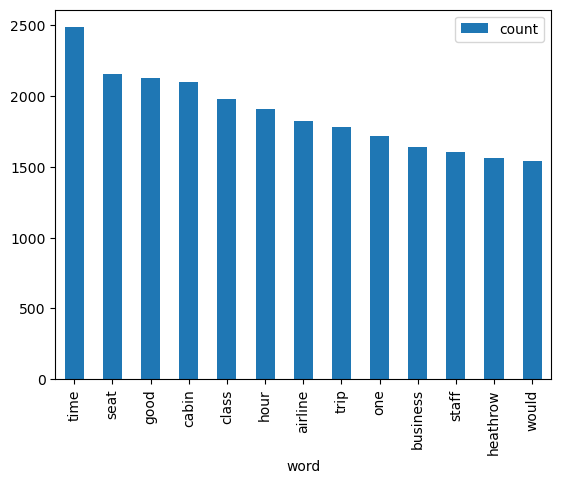

In [108]:
word_freq[word_freq["count"] > 1500].plot.bar(x="word", y="count")
plt.show(block=True)

#### Wordcloud

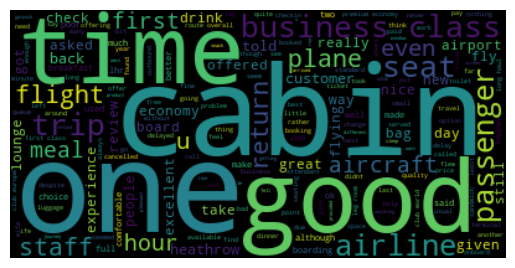

In [111]:
text = " ".join(i for i in df.clean_text)

wordcloud = WordCloud().generate(text)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()